# 1. Reading and Understanding Data

In [1457]:
#Importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

In [1458]:
#Reading data frame fro csv file
bike=pd.read_csv("day.csv")

In [1459]:
#checking first five rows of the dataset
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [1460]:
#checkign dimesnions of the dataset
bike.shape

(730, 16)

In [1461]:
#checking null values if any present
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [1462]:
#dropping duplicates if any
bike.drop_duplicates(inplace=True)

In [1463]:
#checkign the shape of the dataset
bike.shape

(730, 16)

#### No duplicates were present as the same remains same


In [1464]:
#dropping some redundant nad non useful columns
#instant is the record index not required
#dteday is made up of month and year present separately so removing it
#casual and registered are included in our target variable "cnt" so removing those too
bike.drop(["instant","dteday","casual","registered"],axis=1,inplace=True)

In [1465]:
#displaying dataset to see the changes
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [1466]:
#Encoding the following columns: season,mnth,weekday,weathersit
bike.season=bike.season.map({1:"spring", 2:"summer", 3:"fall", 4:"winter"})
bike.mnth=bike.mnth.map({1:"Jan",2:"Feb",3:"Mar",4:"Apr",5:"May",6:"Jun",7:"Jul",8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"Dec"})
bike.weekday=bike.weekday.map({0:"Sun",1:"Mon",2:"Tue",3:"Wed",4:"Thu",5:"Fri",6:"Sat"})
bike.weathersit=bike.weathersit.map({1:"Clear",2:"Mist",3:"Light_Snow",4:"Heavy_Rain"})


In [1467]:
#displaying the dataset
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


# 2. Visualising Data

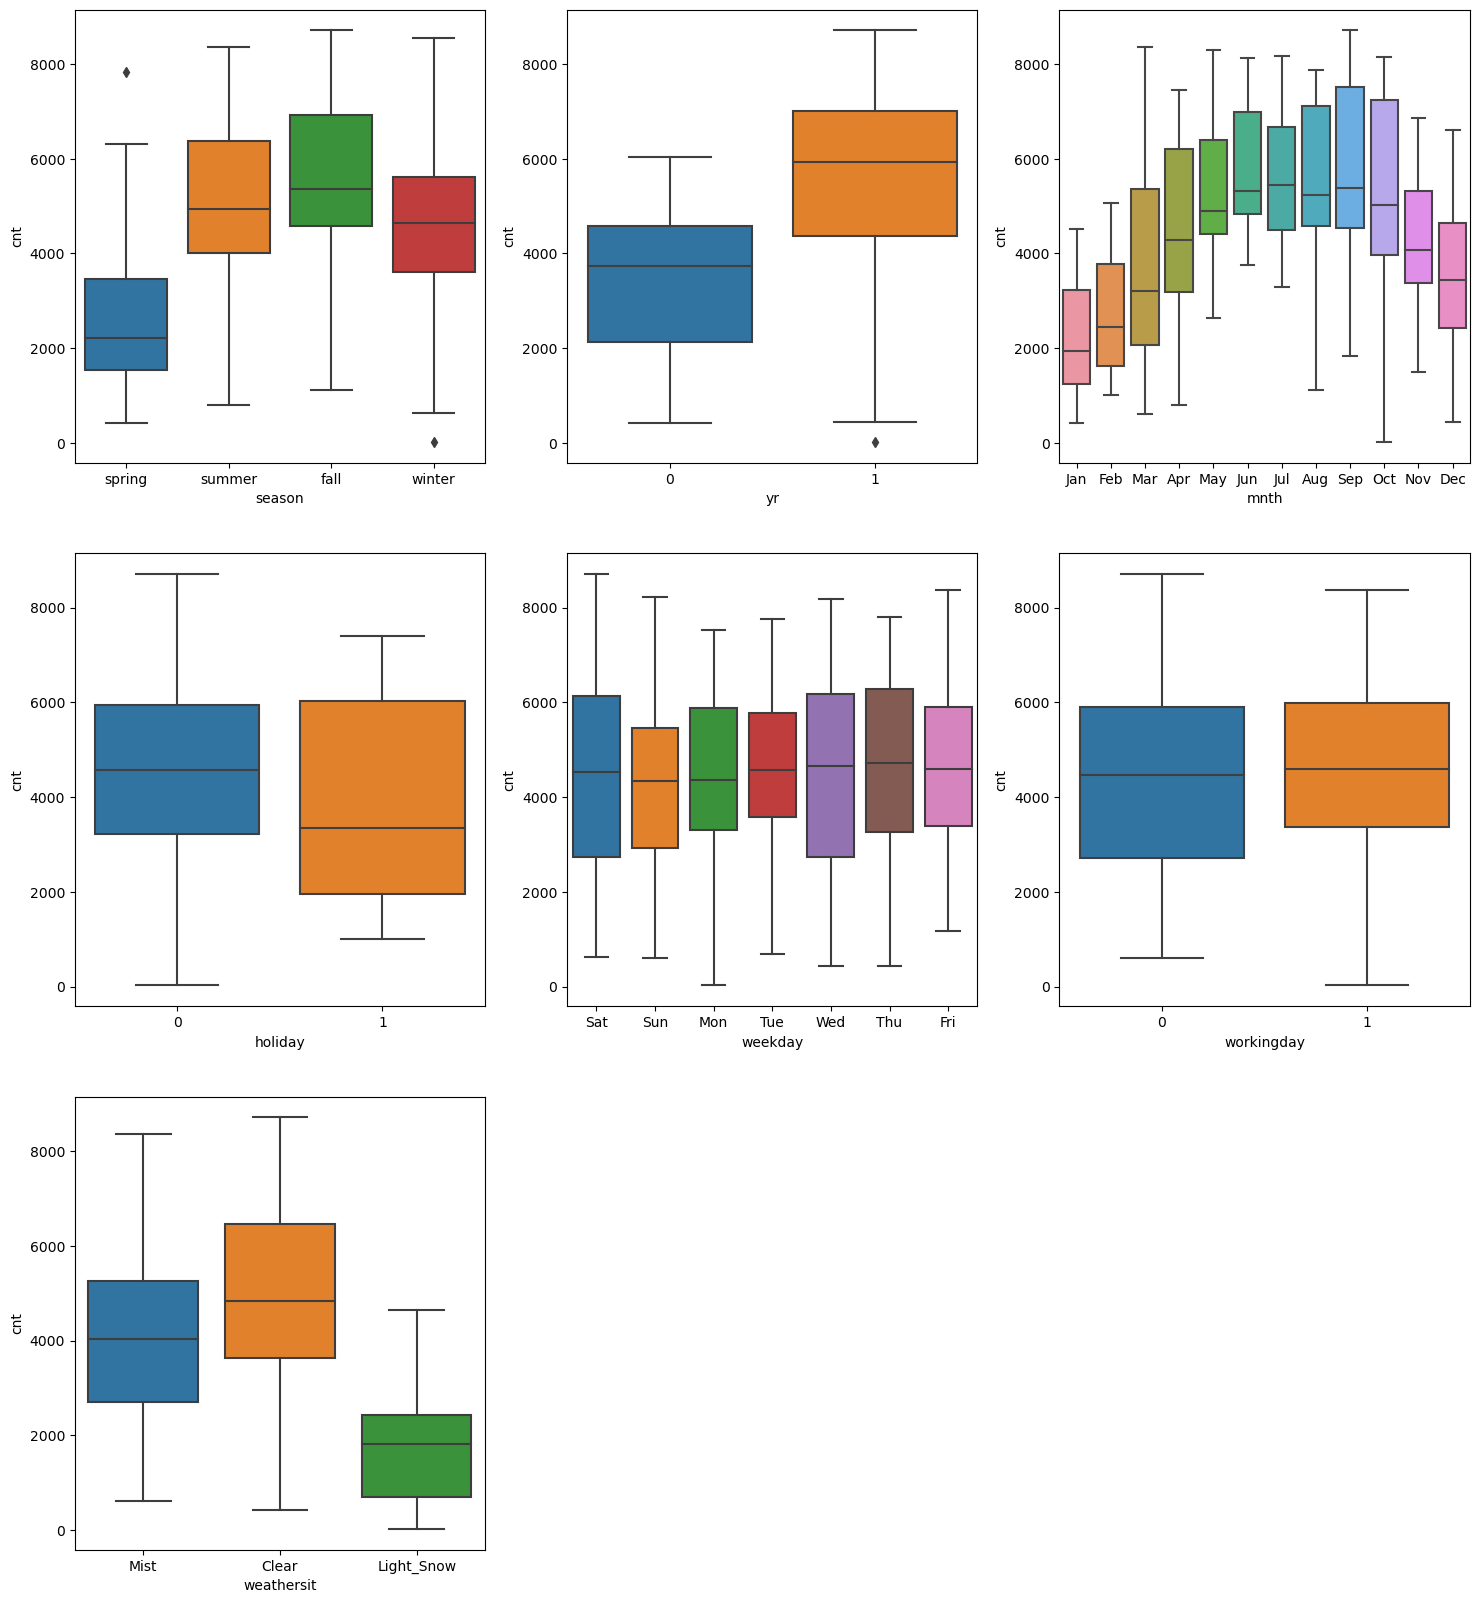

In [1468]:
#Visualising the categorical columns against the target variable
plt.figure(figsize=(18,20))
plt.subplot(3,3,1)
sns.boxplot(bike,x="season",y="cnt")
plt.subplot(3,3,2)
sns.boxplot(bike,x="yr",y="cnt")
plt.subplot(3,3,3)
sns.boxplot(bike,x="mnth",y="cnt")
plt.subplot(3,3,4)
sns.boxplot(bike,x="holiday",y="cnt")
plt.subplot(3,3,5)
sns.boxplot(bike,x="weekday",y="cnt")
plt.subplot(3,3,6)
sns.boxplot(bike,x="workingday",y="cnt")
plt.subplot(3,3,7)
sns.boxplot(bike,x="weathersit",y="cnt")
plt.show()

In [1469]:
def plot_categorical_columns(col):
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    sns.barplot(data=bike,x=col,y="cnt")
    plt.subplot(1,2,2)
    sns.barplot(data=bike,x=col,y="cnt",hue="yr")
    plt.show()

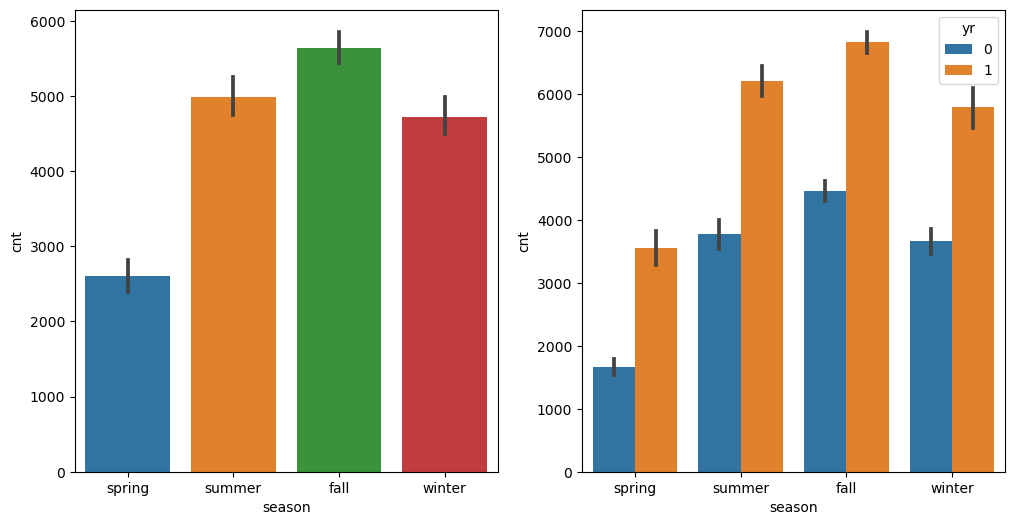

In [1470]:
plot_categorical_columns("season")

- Fall season has attracted more users and in the year 2019 also this trend followed

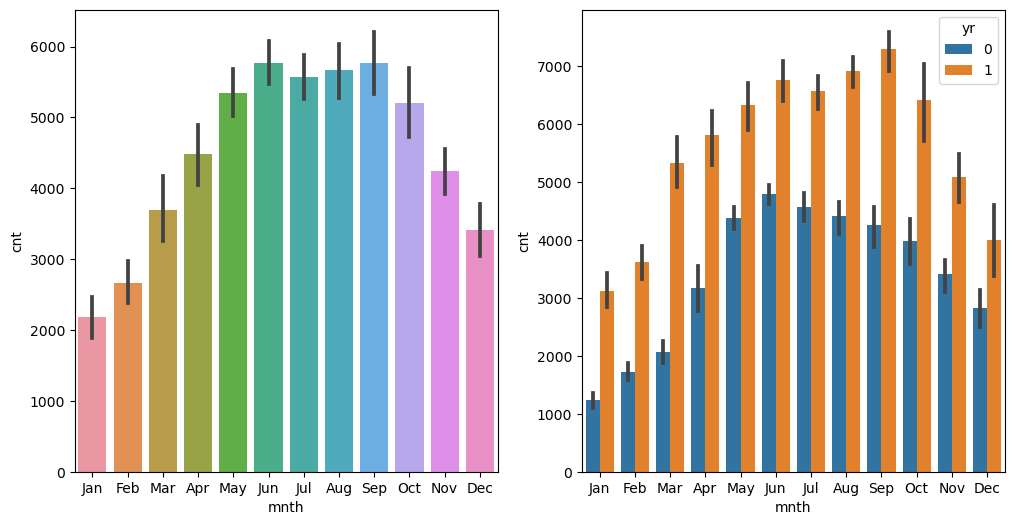

In [1471]:
plot_categorical_columns("mnth")

- Bookings have been higher starting from the month of May till October
- Same trend followed in the next year too

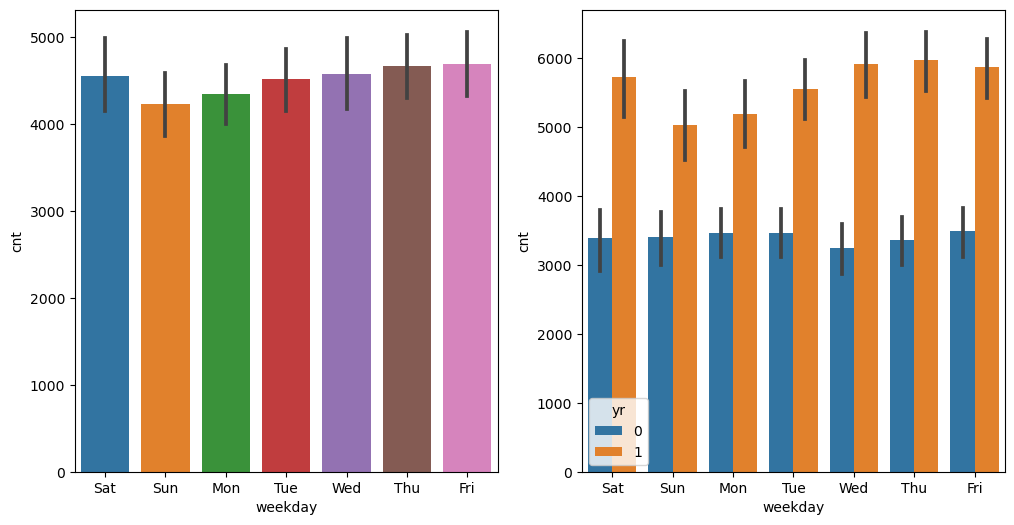

In [1472]:
plot_categorical_columns("weekday")

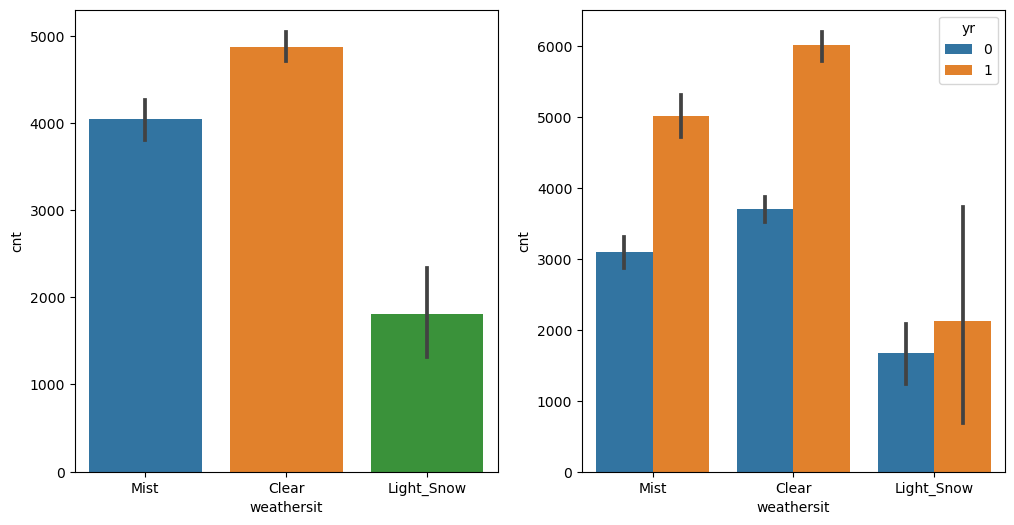

In [1473]:
plot_categorical_columns("weathersit")

- Clear weather season has attracted more bookings.

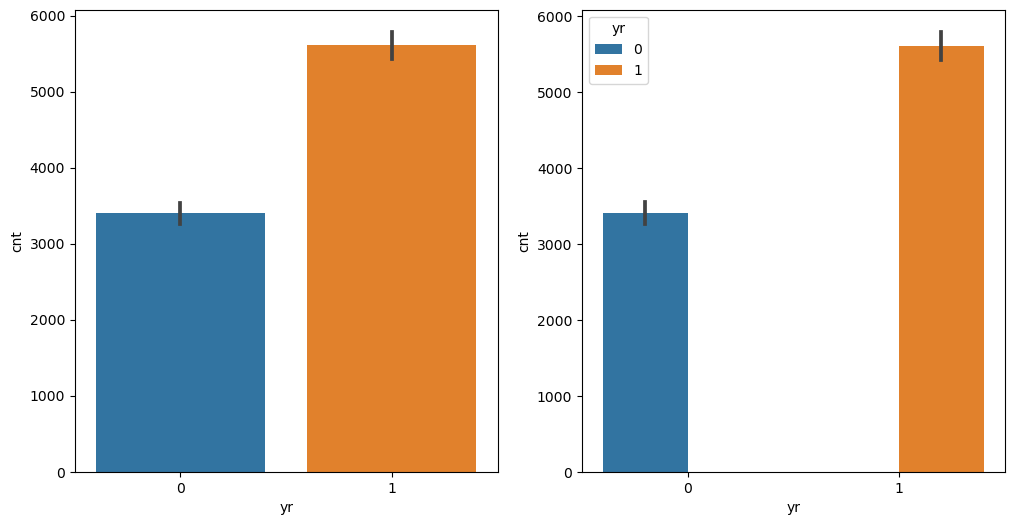

In [1474]:
plot_categorical_columns("yr")

- 2019 has attracted more bookings proving the business improved

In [1475]:
bike.columns.to_list()

['season',
 'yr',
 'mnth',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'cnt']

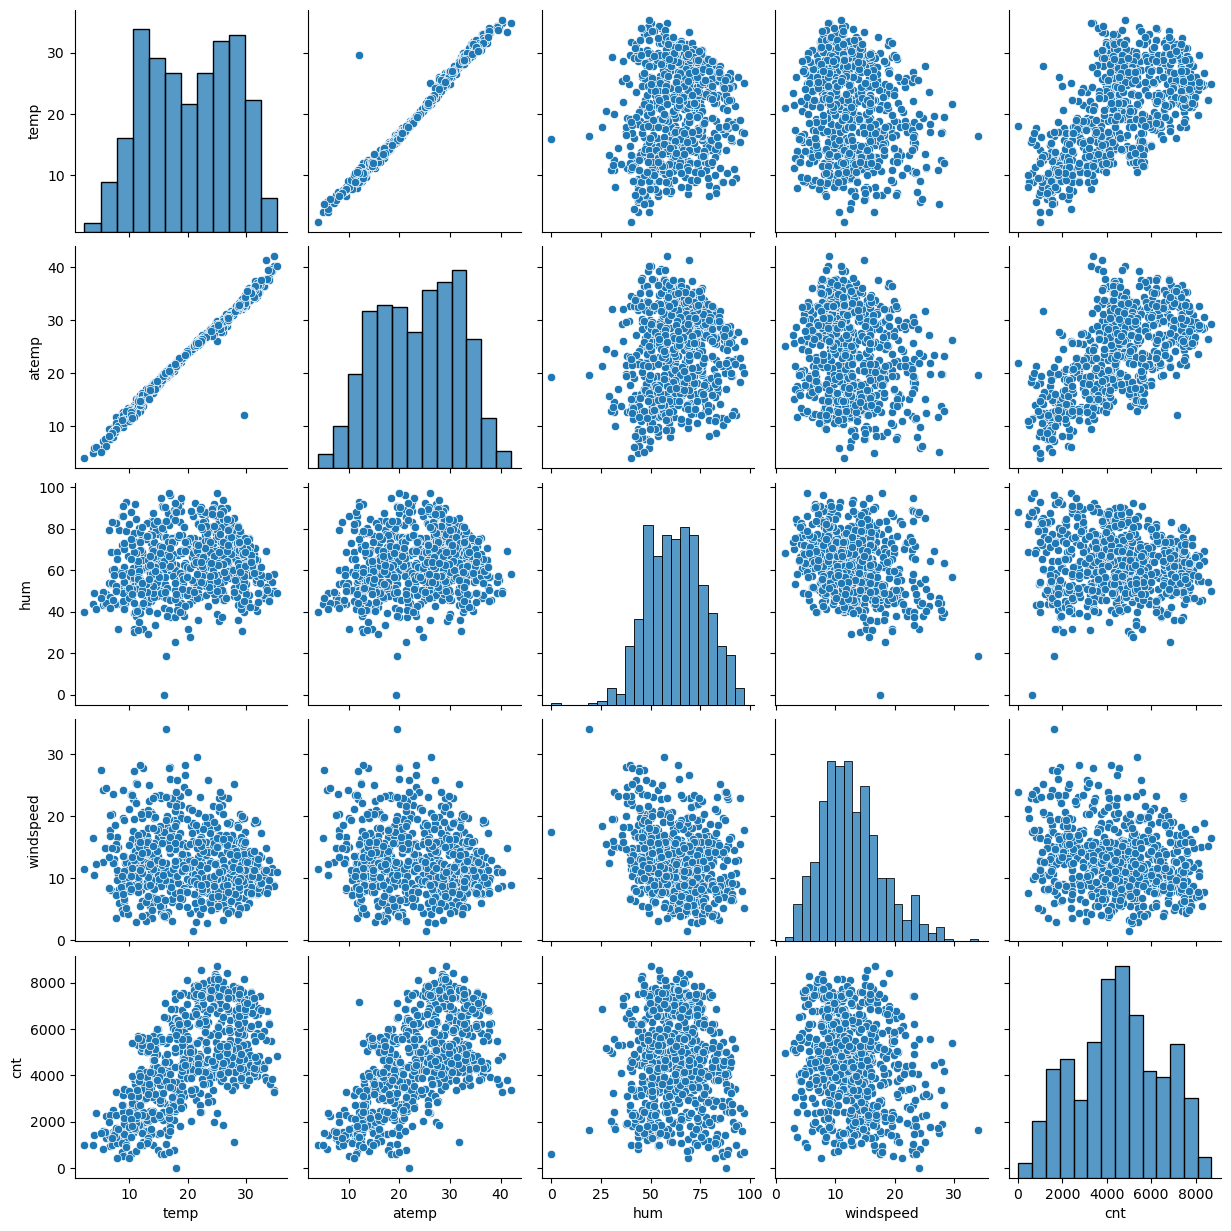

In [1476]:
#Analysing the numerical columns
sns.pairplot(bike,vars=["temp","atemp","hum","windspeed","cnt"])

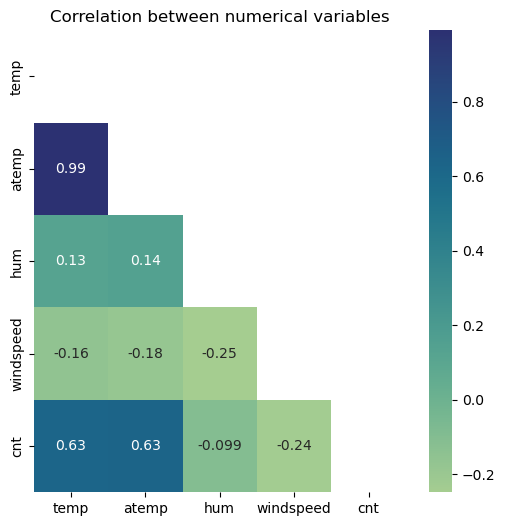

In [1477]:
#checking correlation of numerical variables 
plt.figure(figsize=(6,6))
matrix=np.triu(bike[["temp","atemp","hum","windspeed","cnt"]].corr())
sns.heatmap(bike[["temp","atemp","hum","windspeed","cnt"]].corr(),annot=True,cmap="crest",mask=matrix)
plt.title("Correlation between numerical variables")
plt.show()


- Variables </b>"temp"</b> and </b>"atemp"</b> show strong linear relationship and can't be used due to
  multicollinearity, we will eliminate one by performing VIF & p-value check later.

# 3. Data Preparation

In [1478]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [1479]:
#Dummy variable creation for: season,mnth,weekday,weathersit
bike_season=pd.get_dummies(bike["season"],drop_first=True,dtype=int)
bike_mnth=pd.get_dummies(bike["mnth"],drop_first=True,dtype=int)
bike_weekday=pd.get_dummies(bike["weekday"],drop_first=True,dtype=int)
bike_weathersit=pd.get_dummies(bike["weathersit"],drop_first=True,dtype=int)

In [1480]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [1481]:
#Merging the above formed dataframes
bike_new=pd.concat([bike,bike_season,bike_mnth,bike_weekday,bike_weathersit],axis=1)
bike_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light_Snow,Mist
0,spring,0,Jan,0,Sat,0,Mist,14.110847,18.18125,80.5833,...,0,0,0,1,0,0,0,0,0,1
1,spring,0,Jan,0,Sun,0,Mist,14.902598,17.68695,69.6087,...,0,0,0,0,1,0,0,0,0,1
2,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,1,0,0,0
4,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,1,0,0


In [1482]:
#Dropping non-required variables as we have created dummies
bike_new.drop(["season","mnth","weekday","weathersit"],axis=1,inplace=True)

In [1483]:
bike_new.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light_Snow,Mist
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


# 4. Splitting data into Train & Test set

In [1484]:
#Splitting dataset into 70:30 ratio
bike_train,bike_test=train_test_split(bike_new,test_size=0.7,random_state=100)

In [1485]:
#Displaying train set
bike_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light_Snow,Mist
519,1,0,1,24.497500,28.91415,48.7083,19.083811,6998,0,1,...,0,0,1,0,0,0,0,0,0,0
517,1,0,0,23.916653,28.31440,54.9167,12.499654,8120,0,1,...,0,0,0,1,0,0,0,0,0,0
132,0,0,1,21.012500,24.71500,86.3333,12.041575,4105,0,1,...,0,0,0,0,0,0,0,0,0,1
26,0,0,1,7.995000,10.98500,68.7500,7.627079,431,1,0,...,0,0,0,0,0,1,0,0,0,0
291,0,0,1,22.211299,25.69240,89.5217,16.303713,2424,0,0,...,1,0,0,0,0,0,0,1,1,0


In [1486]:
#Displaying train set
bike_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light_Snow,Mist
184,0,1,0,29.793347,33.27085,63.7917,5.459106,6043,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,32.082500,36.04875,59.2083,7.625404,6211,0,1,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,19.270000,22.85230,81.2917,13.250121,2659,0,0,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,31.433347,34.24915,42.4167,13.417286,4780,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,29.315000,32.19710,30.5000,19.583229,4968,0,1,...,0,0,0,0,0,1,0,0,0,0


In [1487]:
#Creating object to rescale the features to bring into same scale
scaler=MinMaxScaler()

In [1488]:
# Apply scaler() to all the columns except "Yes/No" and "Dummy variables"
num_vars=["temp","atemp","hum","windspeed","cnt"]
bike_train[num_vars]=scaler.fit_transform(bike_train[num_vars])

In [1489]:
# Checking head of the dataset to see the performed changes
bike_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light_Snow,Mist
519,1,0,1,0.669039,0.687601,0.518413,0.518178,0.828017,0,1,...,0,0,1,0,0,0,0,0,0,0
517,1,0,0,0.648873,0.670296,0.584491,0.305497,0.969487,0,1,...,0,0,0,1,0,0,0,0,0,0
132,0,0,1,0.548043,0.566443,0.918865,0.290701,0.463245,0,1,...,0,0,0,0,0,0,0,0,0,1
26,0,0,1,0.096085,0.170293,0.731722,0.148104,0.000000,1,0,...,0,0,0,0,0,1,0,0,0,0
291,0,0,1,0.589664,0.594644,0.952799,0.428376,0.251292,0,0,...,1,0,0,0,0,0,0,1,1,0


In [1490]:
# Describe the dataset to observe min and max values
bike_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light_Snow,Mist
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.474886,0.018265,0.707763,0.511058,0.524314,0.660680,0.327204,0.510317,0.255708,0.255708,...,0.105023,0.068493,0.155251,0.164384,0.109589,0.141553,0.114155,0.182648,0.031963,0.315068
std,0.500513,0.134214,0.455833,0.256364,0.232365,0.148021,0.174069,0.251704,0.437258,0.437258,...,0.307285,0.253169,0.362974,0.371472,0.313092,0.349389,0.318728,0.387263,0.176306,0.465607
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.283512,0.329197,0.557439,0.195154,0.308851,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.527876,0.549137,0.659880,0.306861,0.511033,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.721646,0.703546,0.766534,0.413173,0.701929,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


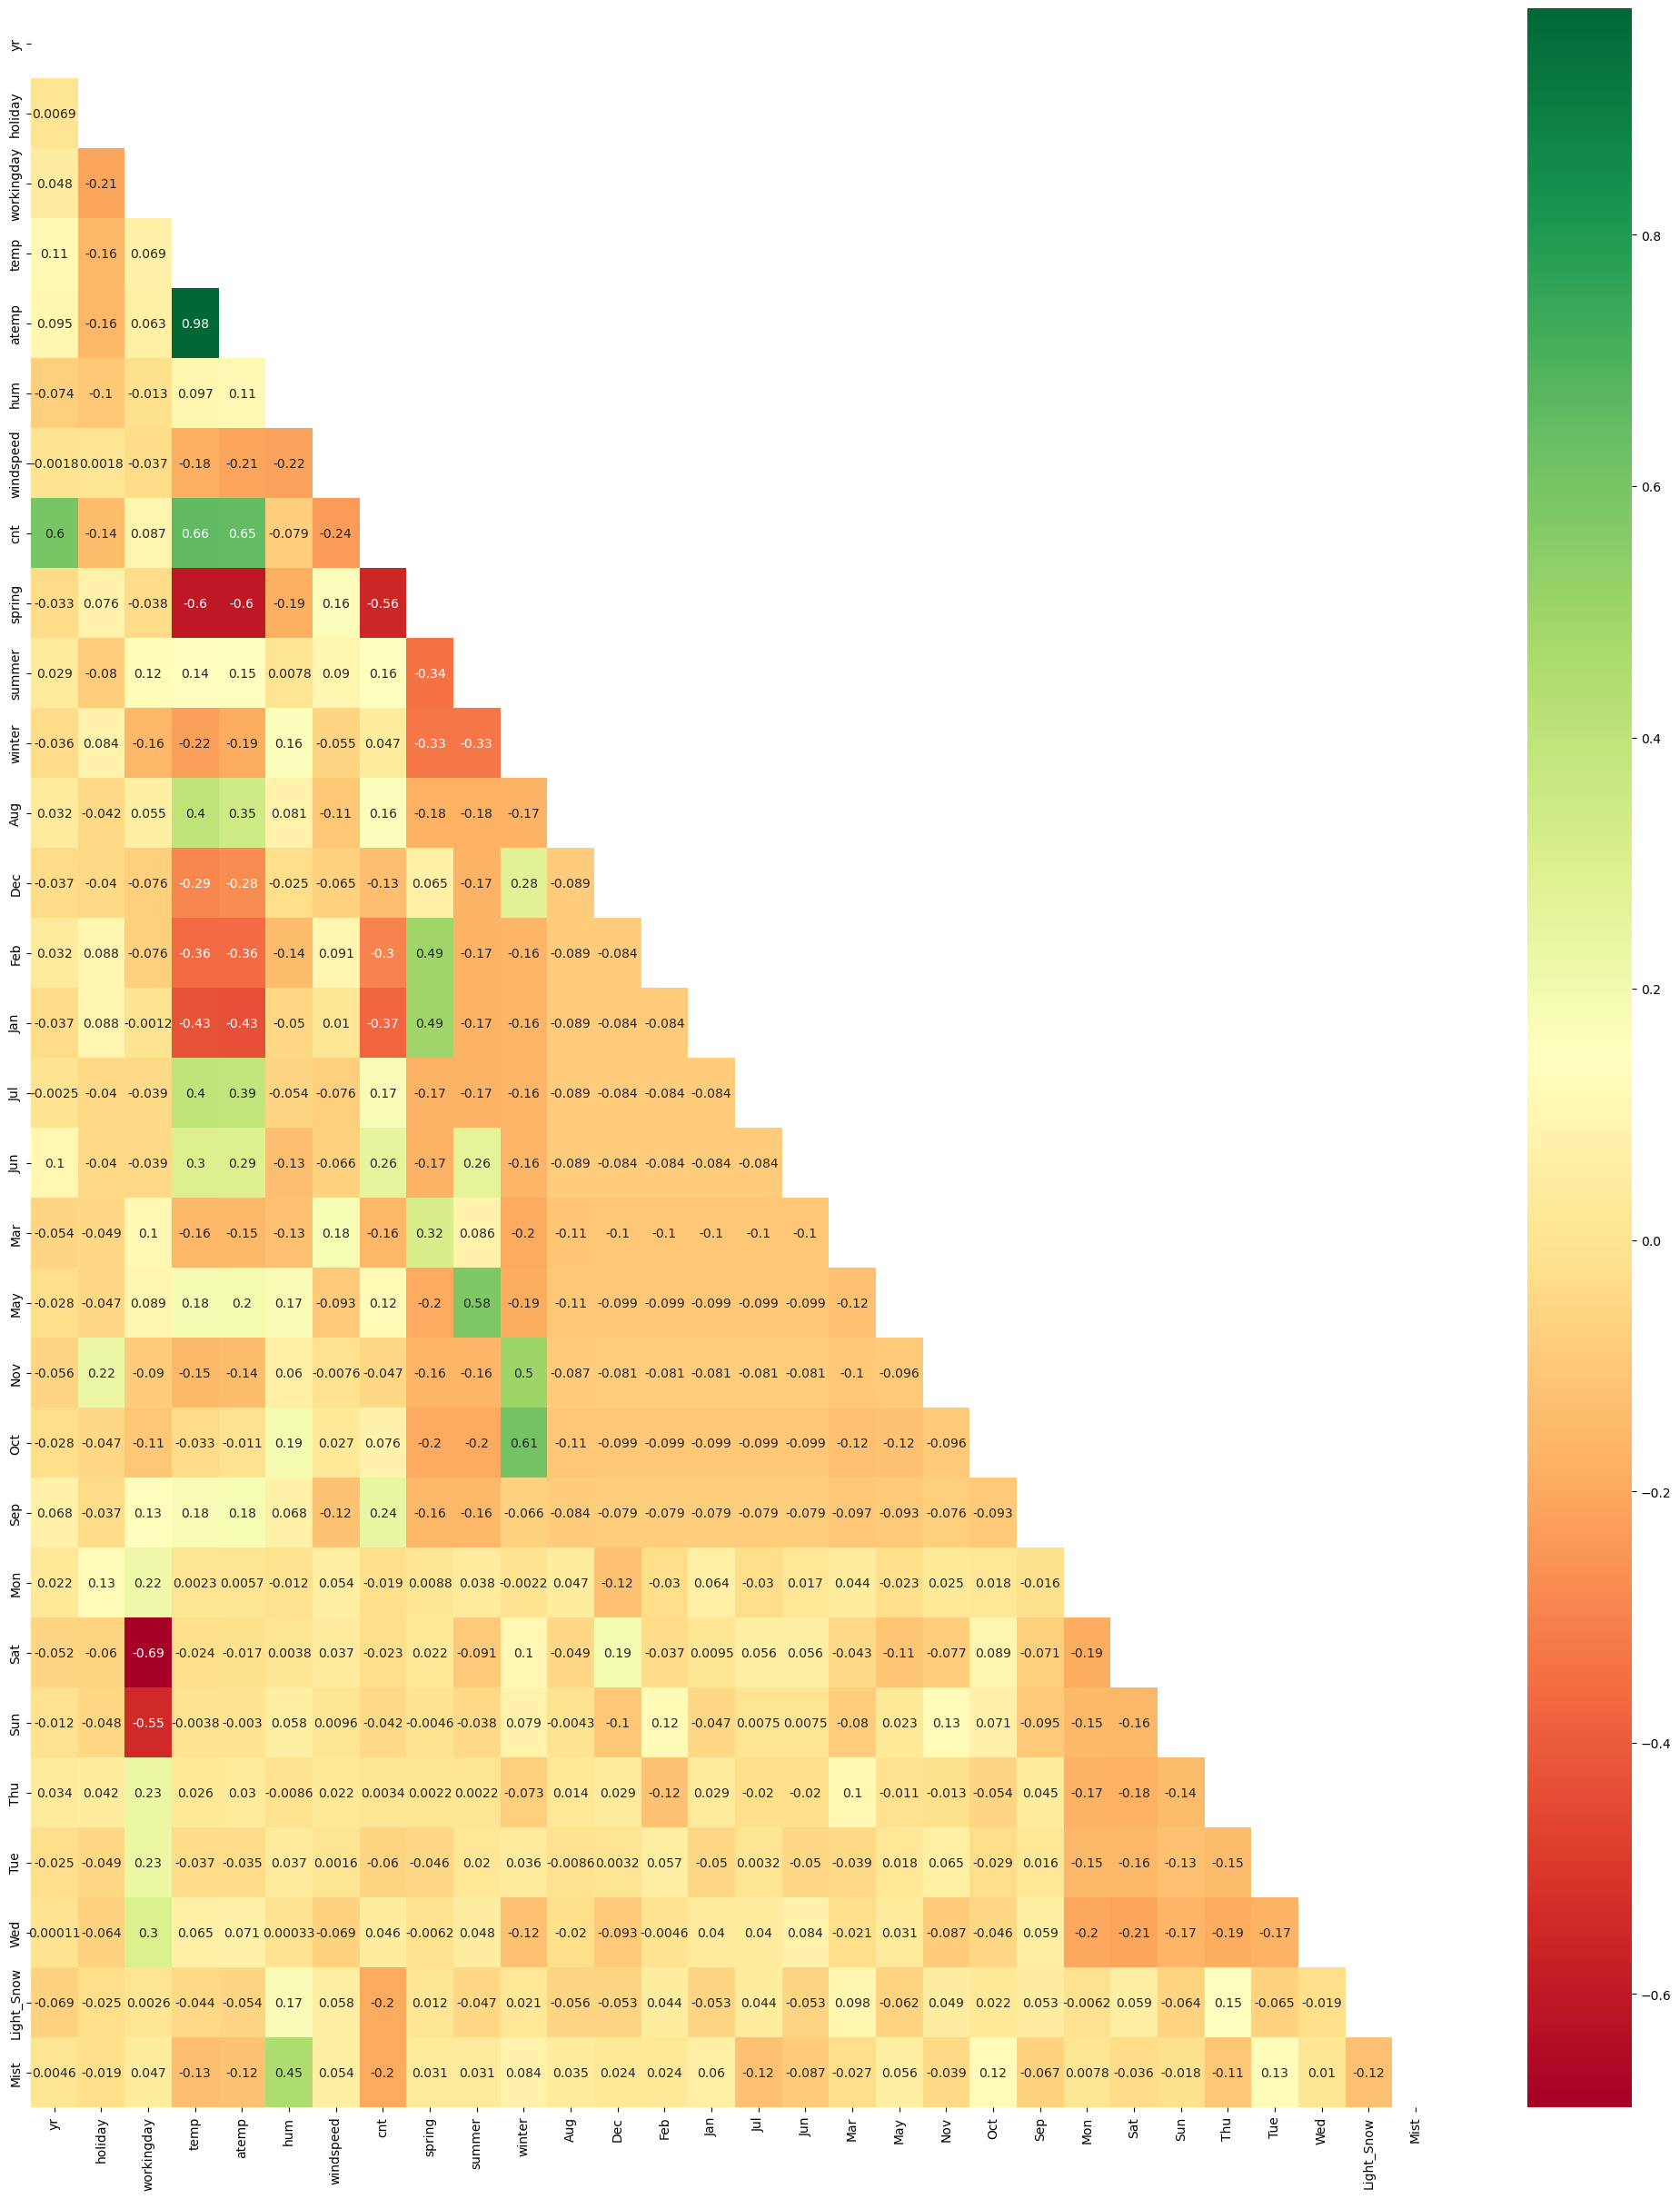

In [1491]:
# Checking correlation of the variables
plt.figure(figsize=(25,30))
matrix_2=np.triu(bike_train.corr())
sns.heatmap(bike_train.corr(),mask=matrix_2,cmap="RdYlGn",annot=True)
plt.show()

- "cnt" is in good relation with "temp", "atemp" and "year". 
- "Hum" and "Mist" too have good relation.
- "Summer" in good relation with "May"
- "Winter" in good relation with "Oct" and "Nov"

In [1492]:
# Building the Linear Model
y_train=bike_train.pop("cnt")
X_train=bike_train

In [1493]:
# Using RFE technique to get top 15 variables
lm=LinearRegression()
lm.fit(X_train,y_train)

rfe=RFE(lm,n_features_to_select=15)
rfe=rfe.fit(X_train,y_train)

In [1494]:
#Displaying the RFE result
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', False, 12),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', False, 9),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('Jul', False, 7),
 ('Jun', False, 8),
 ('Mar', False, 11),
 ('May', False, 15),
 ('Nov', False, 14),
 ('Oct', False, 10),
 ('Sep', True, 1),
 ('Mon', False, 3),
 ('Sat', True, 1),
 ('Sun', False, 13),
 ('Thu', False, 4),
 ('Tue', True, 1),
 ('Wed', False, 5),
 ('Light_Snow', True, 1),
 ('Mist', True, 1)]

In [1495]:
#Storing selected columns in a variable
col=X_train.columns[rfe.support_]

# 5. Building a Linear Model

#### Using statsmodels for detailed statistics

In [1496]:
# Creating a dataframe with RFE selected variables
X_train_rfe=X_train[col]

In [1497]:
#Adding a contstant variable
X_train_rfe_1=sm.add_constant(X_train_rfe)

In [1498]:
#Running the linear model
lm_1=sm.OLS(y_train,X_train_rfe_1).fit()

In [1499]:
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     87.59
Date:                Sun, 04 Feb 2024   Prob (F-statistic):           6.53e-80
Time:                        13:41:00   Log-Likelihood:                 212.09
No. Observations:                 219   AIC:                            -392.2
Df Residuals:                     203   BIC:                            -338.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2259      0.049      4.647      0.0

In [1500]:
#Calculate VIF of variables for the 1st model
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,16.18
3,temp,7.86
2,workingday,6.82
5,windspeed,3.86
11,Sat,2.43
14,Mist,1.95
0,yr,1.92
7,winter,1.87
6,summer,1.75
9,Jan,1.59


In [1501]:
# "workingday" had high p-value and VIF so dropping it
X_train_rfe_2=X_train_rfe.drop(["workingday"],axis=1)

In [1502]:
# Building 2nd model
X_train_lm_2=sm.add_constant(X_train_rfe_2)
lr_2=sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     92.30
Date:                Sun, 04 Feb 2024   Prob (F-statistic):           4.34e-80
Time:                        13:41:00   Log-Likelihood:                 210.05
No. Observations:                 219   AIC:                            -390.1
Df Residuals:                     204   BIC:                            -339.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2645      0.045      5.912      0.0

In [1503]:
#Calculating VIF for the 2nd build
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_2.values, i) for i in range(X_train_rfe_2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,14.63
2,temp,7.42
4,windspeed,3.63
13,Mist,1.94
0,yr,1.91
6,winter,1.87
5,summer,1.72
8,Jan,1.51
7,Dec,1.32
10,Sat,1.31


In [1504]:
# "Sat" variable has p-value removing it as it will also change VIF values and make it smaller for other variables
X_train_rfe_3=X_train_rfe_2.drop(["Sat"],axis=1)

In [1505]:
#Building the 3rd model
X_train_lm_3=sm.add_constant(X_train_rfe_3)
lr_3=sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     99.61
Date:                Sun, 04 Feb 2024   Prob (F-statistic):           5.43e-81
Time:                        13:41:00   Log-Likelihood:                 209.79
No. Observations:                 219   AIC:                            -391.6
Df Residuals:                     205   BIC:                            -344.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2651      0.045      5.935      0.0

In [1506]:
#Calculating VIF for the 3rd build
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_3.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_3.values, i) for i in range(X_train_rfe_3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,14.61
2,temp,7.36
4,windspeed,3.60
12,Mist,1.94
0,yr,1.91
6,winter,1.86
5,summer,1.72
8,Jan,1.51
7,Dec,1.28
9,Sep,1.19


In [1507]:
# "Dec" variable has p-value removing it as it will also change VIF values and make it smaller for other variables
X_train_rfe_4=X_train_rfe_3.drop(["Dec"],axis=1)

In [1508]:
#Building the 4th model
X_train_lm_4=sm.add_constant(X_train_rfe_4)
lr_4=sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     108.2
Date:                Sun, 04 Feb 2024   Prob (F-statistic):           6.07e-82
Time:                        13:41:00   Log-Likelihood:                 209.60
No. Observations:                 219   AIC:                            -393.2
Df Residuals:                     206   BIC:                            -349.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2583      0.043      5.994      0.0

In [1509]:
#Calculating VIF for the 4th build
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_4.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_4.values, i) for i in range(X_train_rfe_4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,13.66
2,temp,6.91
4,windspeed,3.60
11,Mist,1.92
0,yr,1.91
6,winter,1.82
5,summer,1.70
7,Jan,1.47
8,Sep,1.19
9,Tue,1.15


In [1510]:
# "Jan" variable has p-value removing it as it will also change VIF values and make it smaller for other variables
X_train_rfe_5=X_train_rfe_4.drop(["Jan"],axis=1)

In [1511]:
#Building the 5th model
X_train_lm_5=sm.add_constant(X_train_rfe_5)
lr_5=sm.OLS(y_train,X_train_lm_5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     118.0
Date:                Sun, 04 Feb 2024   Prob (F-statistic):           8.89e-83
Time:                        13:41:00   Log-Likelihood:                 209.07
No. Observations:                 219   AIC:                            -394.1
Df Residuals:                     207   BIC:                            -353.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2468      0.042      5.945      0.0

In [1512]:
#Calculating VIF for the 5th build
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_5.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_5.values, i) for i in range(X_train_rfe_5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,11.08
2,temp,5.70
4,windspeed,3.57
10,Mist,1.91
0,yr,1.90
5,summer,1.61
6,winter,1.61
7,Sep,1.18
8,Tue,1.15
9,Light_Snow,1.13


In [1513]:
# "Tue" variable has p-value removing it as it will also change VIF values and make it smaller for other variables
X_train_rfe_6=X_train_rfe_5.drop(["Tue"],axis=1)

In [1514]:
#Building the 6th model
X_train_lm_6=sm.add_constant(X_train_rfe_6)
lr_6=sm.OLS(y_train,X_train_lm_6).fit()
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     128.9
Date:                Sun, 04 Feb 2024   Prob (F-statistic):           2.10e-83
Time:                        13:41:00   Log-Likelihood:                 207.99
No. Observations:                 219   AIC:                            -394.0
Df Residuals:                     208   BIC:                            -356.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2424      0.042      5.840      0.0

In [1515]:
# Calculating VIF for the 6th build
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_6.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_6.values, i) for i in range(X_train_rfe_6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,11.03
2,temp,5.69
4,windspeed,3.56
0,yr,1.90
9,Mist,1.89
5,summer,1.61
6,winter,1.61
7,Sep,1.18
8,Light_Snow,1.12
1,holiday,1.04


In [1516]:
# "hum" variable has high VIF value removing it
X_train_rfe_7=X_train_rfe_6.drop(["hum"],axis=1)

In [1517]:
#Building the 7th model
X_train_lm_7=sm.add_constant(X_train_rfe_7)
lr_7=sm.OLS(y_train,X_train_lm_7).fit()
print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     133.9
Date:                Sun, 04 Feb 2024   Prob (F-statistic):           1.05e-81
Time:                        13:41:00   Log-Likelihood:                 201.22
No. Observations:                 219   AIC:                            -382.4
Df Residuals:                     209   BIC:                            -348.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1187      0.025      4.836      0.0

In [1518]:
# Calculating VIF for the 7th build
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_7.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_7.values, i) for i in range(X_train_rfe_7.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,3.10
3,windspeed,2.93
0,yr,1.88
4,summer,1.58
8,Mist,1.45
5,winter,1.37
6,Sep,1.17
7,Light_Snow,1.06
1,holiday,1.03


#### In this build "lr_7" the model has low p-values as well as VIF are within the acceptable range, we will consider this build final

In [1519]:
# Checking the parameters and their coefficient values
lr_7.params

const         0.118666
yr            0.264528
holiday      -0.120411
temp          0.545896
windspeed    -0.147656
summer        0.100813
winter        0.160565
Sep           0.131129
Light_Snow   -0.228555
Mist         -0.088935
dtype: float64

# 6. Residual Analysis of the train data

- Checking the errors terms to see the normality in their behavior (assumption of LR), by plotting a histogram of the error       terms

In [1520]:
y_train_pred=lr_7.predict(X_train_lm_7)

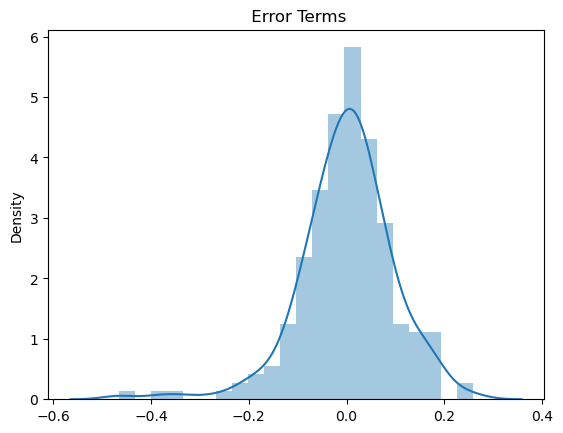

In [1521]:
# Plotting the histogram for the error terms
sns.distplot((y_train-y_train_pred))
plt.title(" Error Terms")
plt.show()

- #### Error terms are following the normal distribution curve

# 7. Making predictions using the final model

In [1522]:
# Applying scaling on the test data
num_vars=["temp","atemp","hum","windspeed","cnt"]
bike_test[num_vars]=scaler.transform(bike_test[num_vars])
bike_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light_Snow,Mist
184,0,1,0,0.852907,0.813304,0.678949,0.078074,0.707603,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.932384,0.893455,0.630167,0.148050,0.728786,0,1,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.487544,0.512699,0.865206,0.329739,0.280923,0,0,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.909846,0.841531,0.451450,0.335139,0.548355,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.836299,0.782324,0.324618,0.534310,0.572059,0,1,...,0,0,0,0,0,1,0,0,0,0


In [1523]:
# Checking the result
bike_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light_Snow,Mist
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.510763,0.033268,0.673190,0.529510,0.543747,0.671171,0.308376,0.515664,0.242661,0.250489,...,0.076321,0.088063,0.138943,0.135029,0.158513,0.142857,0.154599,0.123288,0.027397,0.346380
std,0.500374,0.179512,0.469507,0.262488,0.236334,0.153050,0.164944,0.241011,0.429112,0.433719,...,0.265771,0.283664,0.346226,0.342090,0.365579,0.350270,0.361876,0.329089,0.163398,0.476282
min,0.000000,0.000000,0.000000,-0.097323,-0.032587,0.270516,-0.049804,-0.051570,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.304864,0.343311,0.552339,0.192476,0.356449,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.530249,0.557349,0.671410,0.288013,0.521750,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.754448,0.734974,0.781168,0.403772,0.696633,0.000000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.045078,1.066458,1.035053,0.814264,1.044383,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X_test and y_test

In [1524]:
y_test=bike_test.pop("cnt")
X_test=bike_test

In [1525]:
X_test_m7.head()

,const,yr,holiday,temp,windspeed,summer,winter,Sep,Light_Snow,Mist
184,1.0,0,1,0.852907,0.078074,0,0,0,0,1
535,1.0,1,0,0.932384,0.148050,1,0,0,0,0
299,1.0,0,0,0.487544,0.329739,0,1,0,0,1
221,1.0,0,0,0.909846,0.335139,0,0,0,0,0
152,1.0,0,0,0.836299,0.534310,1,0,0,0,0


In [1526]:
# Extracting only the filtered variables
X_test_m7=X_test[col]
X_test_m7=sm.add_constant(X_test_m7)
X_test_m7.head()

,const,yr,holiday,workingday,temp,hum,windspeed,summer,winter,Dec,Jan,Sep,Sat,Tue,Light_Snow,Mist
184,1.0,0,1,0,0.852907,0.678949,0.078074,0,0,0,0,0,0,0,0,1
535,1.0,1,0,1,0.932384,0.630167,0.148050,1,0,0,0,0,0,0,0,0
299,1.0,0,0,1,0.487544,0.865206,0.329739,0,1,0,0,0,0,0,0,1
221,1.0,0,0,1,0.909846,0.451450,0.335139,0,0,0,0,0,0,0,0,0
152,1.0,0,0,1,0.836299,0.324618,0.534310,1,0,0,0,0,0,0,0,0


In [1527]:
# Removing variables so as to match with the final trained model
X_test_m7=X_test_m7.drop(["workingday","Sat","Dec","Jan","Tue","hum"],axis=1)
X_test_m7.head()

,const,yr,holiday,temp,windspeed,summer,winter,Sep,Light_Snow,Mist
184,1.0,0,1,0.852907,0.078074,0,0,0,0,1
535,1.0,1,0,0.932384,0.148050,1,0,0,0,0
299,1.0,0,0,0.487544,0.329739,0,1,0,0,1
221,1.0,0,0,0.909846,0.335139,0,0,0,0,0
152,1.0,0,0,0.836299,0.534310,1,0,0,0,0


In [1528]:
# Predicting test values using the final model
y_pred_m7=lr_7.predict(X_test_m7)

# 8. Model Evaluation

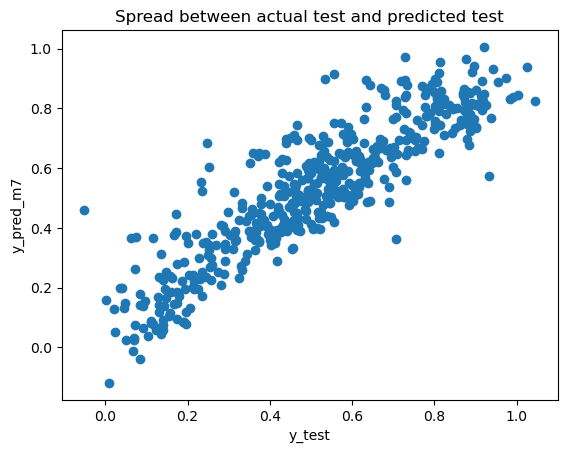

In [1529]:
# Plot y_test and y_pred_m7 to understand the spread
plt.scatter(y_test,y_pred_m7)
plt.xlabel("y_test")
plt.ylabel("y_pred_m7")
plt.title("Spread between actual test and predicted test")
plt.show()

- We can see a pretty decent spread of the data which seems linear whose equation is derived using the found parameters

In [1530]:
# Displaying the coeff. and intercept of the fitted line model
round(lr_7.params,4)

const         0.1187
yr            0.2645
holiday      -0.1204
temp          0.5459
windspeed    -0.1477
summer        0.1008
winter        0.1606
Sep           0.1311
Light_Snow   -0.2286
Mist         -0.0889
dtype: float64

- We can see the equation for our best fitted line is:

<b>cnt = 0.1187 + 0.2645 * yr - 0.1204 * holiday + 0.5459 * temp - 0.1477 * windspeed + 0.1008 * summer + 0.1606 * winter + 0.1311 * Sep - 0.2286 * Light_Snow -  0.0889 * Mist</b>

In [1531]:
# Calculating R2 score on the test data:
print("R2 score train data: 85.20 %")
print("R2 score test data:",round(r2_score(y_test, y_pred_m7)*100,2),"%")

R2 score train data: 85.20 %
R2 score test data: 79.55 %


### Demand of bikes depend on the following variables:
- yr
- holiday
- temp
- windspeed
- summer
- winter
- Sep
- Light_Snow
- Mist